In [1]:
import seaborn as sns
import time
import matplotlib.pyplot as plt
import numpy as np
import mdptoolbox, hiive.mdptoolbox.example
from gym.envs.toy_text.frozen_lake import generate_random_map


In [2]:
random_map_10 = generate_random_map(size=2)
P, R = hiive.mdptoolbox.example.openai("FrozenLake-v0", desc=random_map_10, is_slippery=True)

In [3]:
print(random_map_10)

['SH', 'FG']


In [10]:
v = mdptoolbox.mdp.ValueIteration(P,R,0.9, epsilon=0.00001)
p = mdptoolbox.mdp.PolicyIterationModified(P,R,0.9, epsilon= 0.00001)
q = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9, epsilon=1.0, epsilon_decay=1-10**-5.2, alpha=0.1, alpha_decay= 1-10**-8.5, skip_check=True)
# q = hiive.mdptoolbox.mdp.QLearning(P_20, R_20, 0.9, epsilon=1.0, epsilon_decay=1-10**-5.2, alpha=0.1, alpha_decay= 1-10**-8.5, skip_check=True)
iter = 400000
# q.max_iter=iter

In [11]:
v.run()
p.run()
q.run()

[{'State': 2,
  'Action': 3,
  'Reward': 0.3333333333333333,
  'Error': 0.03333333333333333,
  'Time': 0.0,
  'Alpha': 0.1,
  'Epsilon': 1.0,
  'Gamma': 0.9,
  'V[0]': 0.0,
  'Max V': 0.03333333333333333,
  'Mean V': 0.008333333333333333,
  'Iteration': 1},
 {'State': 0,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.002999999990513167,
  'Time': 0.0,
  'Alpha': 0.09999999968377224,
  'Epsilon': 0.9999936904265552,
  'Gamma': 0.9,
  'V[0]': 0.002999999990513167,
  'Max V': 0.03333333333333333,
  'Mean V': 0.009083333330961625,
  'Iteration': 2},
 {'State': 2,
  'Action': 3,
  'Reward': 0.3333333333333333,
  'Error': 0.030269999807701897,
  'Time': 0.0,
  'Alpha': 0.09999999936754447,
  'Epsilon': 0.999987380892921,
  'Gamma': 0.9,
  'V[0]': 0.002999999990513167,
  'Max V': 0.06360333314103522,
  'Mean V': 0.016650833282887096,
  'Iteration': 3},
 {'State': 0,
  'Action': 2,
  'Reward': 0.0,
  'Error': 0.0002699999965847402,
  'Time': 0.0,
  'Alpha': 0.09999999905131671,
  'Epsilon': 0.99

In [12]:
print(np.mean(v.V))
print(np.mean(p.V))
print(np.mean(q.V))

0.36458285664269385
0.36458303902867767
0.15795735680407363


In [13]:
stats = q.run_stats
qvalue = []
rewards = []
errors=[]
eps=[]
al=[]

In [14]:
q.policy

(2, 0, 3, 0)

In [17]:
for i in stats:
    eps.append(i['Epsilon'])
    al.append(i['Alpha'])
    qvalue.append(i['Mean V'])
    rewards.append(i['Reward'])
    errors.append(i['Error'])

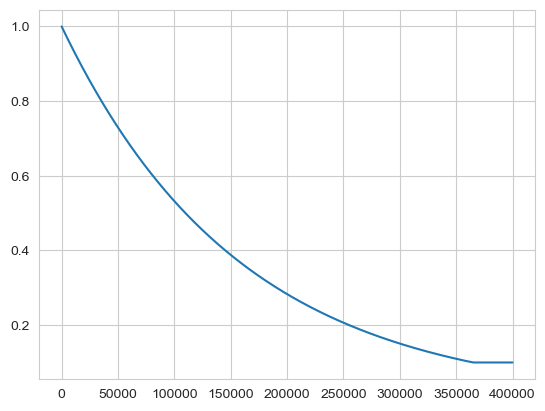

In [18]:
plt.plot(range(iter), eps)

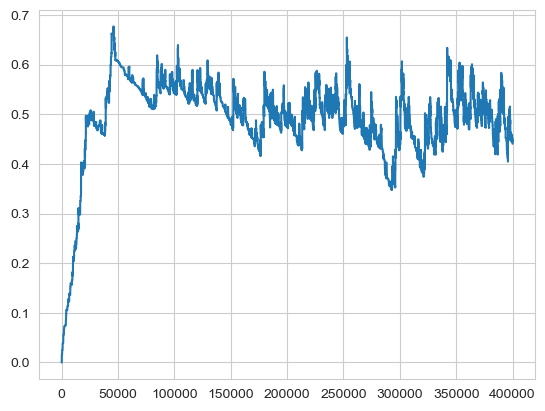

In [264]:
plt.plot(range(iter), qvalue)

1.05775


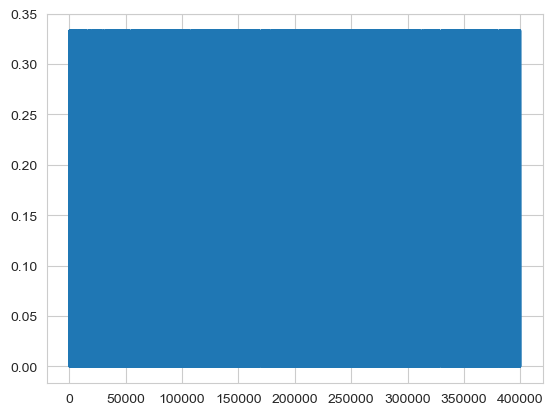

In [265]:
plt.plot(range(iter), rewards)
print(np.count_nonzero(rewards)/len(rewards)*100)

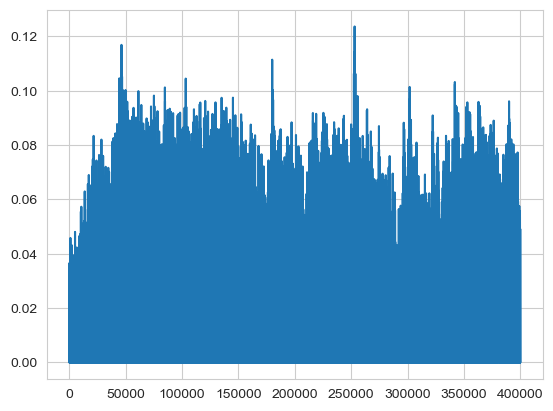

In [266]:
plt.plot(range(iter), errors)

In [19]:
print(p.policy)
print(q.policy)
print(v.policy)

(1, 2, 1, 0)
(2, 0, 3, 0)
(1, 2, 1, 0)


In [229]:
def map_discretize(map):
    size = len(map)
    dis_map = np.zeros((size,size))
    for i, row in enumerate(map):
        for j, loc in enumerate(row):
            if loc == "S":
                dis_map[i, j] = 0
            elif loc == "F":
                dis_map[i, j] = 0
            elif loc == "H":
                dis_map[i, j] = -1
            elif loc == "G":
                dis_map[i, j] = 1
    return dis_map


def policy_numpy(policy):
    size = int(np.sqrt(len(policy)))
    pol = np.asarray(policy)
    pol = pol.reshape((size, size))
    return pol


def policy_display(map, policy):
    size = len(map)
    new_map = np.zeros((size,size))
    for i, row in enumerate(map):
        for j, loc in enumerate(row):
            if loc == "S":
                new_map[i, j] = 1.2
            elif loc == "F":
                new_map[i, j] = 1
            elif loc == "H":
                new_map[i, j] = -1
            elif loc == "G":
                new_map[i, j] = 0
    pol = np.reshape(policy, (size,size))
    plt.rcParams["figure.figsize"] = [8, 6]
    # plt.rcParams["figure.autolayout"] = True
    plt.imshow(new_map, interpolation="nearest")
    ax = plt.gca()
    ax.set_xticks(np.arange(-.5, size-1, 1))
    ax.set_yticks(np.arange(-.5, size-1, 1))
    ax.set_xticklabels(np.arange(0, size, 1))
    ax.set_yticklabels(np.arange(0, size, 1))
    ax.grid(color='red', linestyle='-.', linewidth=1)

    for i in range(pol[0].size):
        for j in range(pol[0].size):
            arrow = '\u2190'
            if pol[i, j] == 1:
                arrow = '\u2193'
            elif pol[i, j] == 2:
                arrow = '\u2192'
            elif pol[i, j] == 3:
                arrow = '\u2191'
            text = plt.text(j, i, arrow,
                           ha="center", va="center", color="g", fontweight='bold')

    plt.show()

In [171]:
random_map_10 = generate_random_map(size=10)
P, R = hiive.mdptoolbox.example.openai("FrozenLake-v0", desc=random_map_10, is_slippery=False)
v = mdptoolbox.mdp.ValueIteration(P,R,0.9, epsilon=0.00001)
v.run()

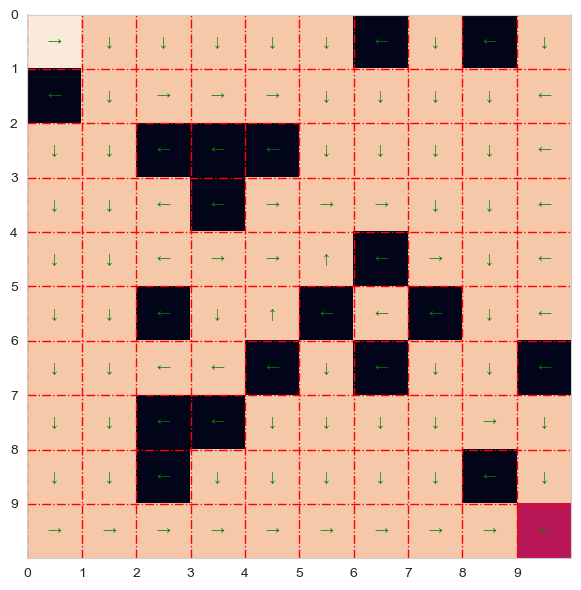

In [230]:
policy_display(random_map_10, v.policy)

In [113]:
size = len(random_map_10)
new_map = np.zeros((size,size))
for i, row in enumerate(random_map_10):
    for j, loc in enumerate(row):
        if loc == "S":
            new_map[i, j] = 0
        elif loc == "F":
            new_map[i, j] = 0
        elif loc == "H":
            new_map[i, j] = -1
        elif loc == "G":
            new_map[i, j] = 1

In [56]:
pol = np.reshape(v.policy, (size,size))

In [57]:
pol

array([[1, 2],
       [1, 0]])

In [60]:
p.policy

(1, 2, 1, 0)